# **Happiness (for my website)**
#### (by David Smolinski)
___
<br>

### **Skills this adds to my portfolio:**
- cross_val_score
- many more classifiers
- pickling
___
<br>

### **Summary:**
This program makes a model (pickle) for predicting happiness based on a survey. The pickle will be used in my "More Somerville Happiness" website.
[I used some code from here.](https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/)
___
<br>

### **What users will be able to do on my website:**
- Add to my database by taking the Somerville Happiness Survey (even if they aren't from Somerville).
- Predict their happiness. At first, this will be for Somerville residents. If my database gets big enough, I can make this feature include non-residents.
- Use a JSON API to read the database data.
___
<br>

### **Links:**
- [my portfolio](https://github.com/DavidSmolinski/portfolio/tree/master/table%20of%20contents)
- [original dataset source (UC Irvine Machine Learning Repository)](https://archive.ics.uci.edu/ml/datasets/Somerville+Happiness+Survey)
- [the csv](https://archive.ics.uci.edu/ml/machine-learning-databases/00479/SomervilleHappinessSurvey2015.csv)
___
<br>

In [20]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import pickle
import seaborn as sn

# classifiers (algorithms for machine learning)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn import model_selection
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm


In [4]:
df = pd.read_csv(r'https://archive.ics.uci.edu/ml/machine-learning-databases/00479/' + 
                 r'SomervilleHappinessSurvey2015.csv', 
                 encoding="'UTF-16'")
df = df.rename(columns={'D':'happy', 'X1':'info', 'X2':'housing', 'X3':'schools', 
                        'X4':'police', 'X5':'streets', 'X6':'events',})
df.head(1)

,happy,info,housing,schools,police,streets,events
0,0,3,3,3,4,2,4


### **Description of the columns in df:**
### **Features (inputs):**
- The following ratings with values of 1 to 5:
    - info: the availability of information about the city services
    - housing: the cost of housing
    - schools: the overall quality of public schools
    - police: trust in the local police
    - streets: the maintenance of streets and sidewalks
    - events: the availability of social community events

### **Response (prediction, output):**
- happy: 0 (unhappy) and 1 (happy)

In [8]:
features = list(df.columns)
features.remove('happy')
x = df[features]
y = df.happy

In [12]:
classifiers = (
    ('LR', LogisticRegression()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('DTC', DecisionTreeClassifier()),
    ('GNB', GaussianNB()),
    ('SVM', SVC())
)
results = []
names = []
scoring = 'accuracy'
for name, classifier in classifiers:
# 	kfold = model_selection.KFold(n_splits=10, random_state=seed)
    kfold = model_selection.KFold(n_splits=10, random_state=4)
    cv_results = model_selection.cross_val_score(classifier, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = f"{name}: {scoring}={cv_results.mean()}, std={cv_results.std()}"
    print(msg)



C:\Users\barbara\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\barbara\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\barbara\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\barbara\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\barbara\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

LR: accuracy=0.5419047619047619, std=0.18054842127890197
LDA: accuracy=0.5557142857142857, std=0.20136777197912464
KNN: accuracy=0.5328571428571428, std=0.19619336567451479
DTC: accuracy=0.5447619047619048, std=0.15013523759984196
GNB: accuracy=0.5638095238095238, std=0.23120702701778686
SVM: accuracy=0.5280952380952381, std=0.2105865903094036


C:\Users\barbara\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\barbara\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\barbara\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\barbara\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: Fut

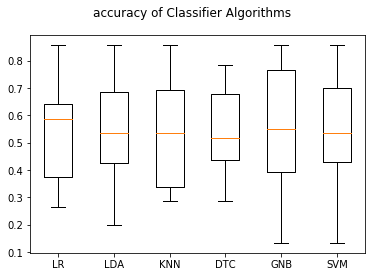

In [14]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle(f'{scoring} of Classifier Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [19]:
knn=KNeighborsClassifier()
k_vals = list(range(1,9))
weight_options = ['uniform', 'distance']
# param_grid={'n_neighbors':k_vals}
param_grid = {'n_neighbors': k_vals, 'weights': weight_options}
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(x,y)
results = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
results

C:\Users\barbara\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,mean_test_score,std_test_score,params
0,0.510490,0.131664,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.510490,0.131664,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.531469,0.143115,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.503497,0.151309,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.517483,0.093147,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,0.510490,0.116951,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.566434,0.138518,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,0.538462,0.137762,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.510490,0.186369,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,0.489510,0.185017,"{'n_neighbors': 5, 'weights': 'distance'}"


In [18]:
GNB = GaussianNB()
param_grid = GNB.get_params()
# GridSearchCV demanded a param_grid with vals that are lists
param_grid = {key:[val] for key, val in param_grid.items()}
grid = GridSearchCV(GNB, param_grid, cv=10, scoring='accuracy')
grid.fit(x,y)
results = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
results

C:\Users\barbara\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,mean_test_score,std_test_score,params
0,0.559441,0.189285,"{'priors': None, 'var_smoothing': 1e-09}"


cross_val_score said that GNB is the best classifier, but I found a better one with GridSearchCV (KNN with n_neighbors=4 and weights='uniform' (default)).

In [22]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [23]:
# Saving the pickle file for the model
# Use joblib instead of pickle for "objects that carry large internal numpy arrays".
with open('happy_somerville_pickle', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
# Open the pickle.
with open('happy_somerville_pickle', 'rb') as f:
    model = pickle.load(f)